<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços dos imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [46]:
dados = pd.read_csv('Dados/HousePrices_HalfMil.csv', sep = ';')

## Visualizar os dados

In [47]:
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Verificando o tamanho do dataset

In [48]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [49]:
dados.describe().round(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000,1000.000,1000.000,1000.00,1000.000,1000.000,1000.000
mean,41985.600,124.326,2.009,3.00,2.034,0.331,0.485
std,12140.385,72.390,0.813,1.43,1.419,0.471,0.500
min,13150.000,1.000,1.000,1.00,0.000,0.000,0.000
25%,33112.500,60.750,1.000,2.00,1.000,0.000,0.000
50%,41725.000,123.000,2.000,3.00,2.000,0.000,0.000
75%,51175.000,187.000,3.000,4.00,3.000,1.000,1.000
max,73675.000,249.000,3.000,5.00,4.000,1.000,1.000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [50]:
dados.corr().round(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000,0.118,0.103,0.124,0.107,0.431,0.632
area,0.118,1.000,-0.008,-0.011,0.012,-0.015,-0.018
garagem,0.103,-0.008,1.000,0.067,0.060,-0.016,-0.021
banheiros,0.124,-0.011,0.067,1.000,0.048,-0.025,-0.018
lareira,0.107,0.012,0.060,0.048,1.000,0.030,-0.004
marmore,0.431,-0.015,-0.016,-0.025,0.030,1.000,-0.007
andares,0.632,-0.018,-0.021,-0.018,-0.004,-0.007,1.000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='Dados/img/Box-Plot.png'>

## Configure o estilo e cor dos gráficos (opcional)

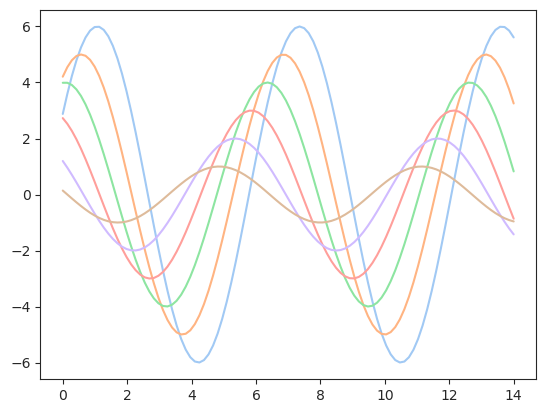

In [51]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        

sns.set_palette("pastel")
sns.set_style("ticks")
sinplot()

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 1.0, 'Distribuição dos preços dos imóveis')

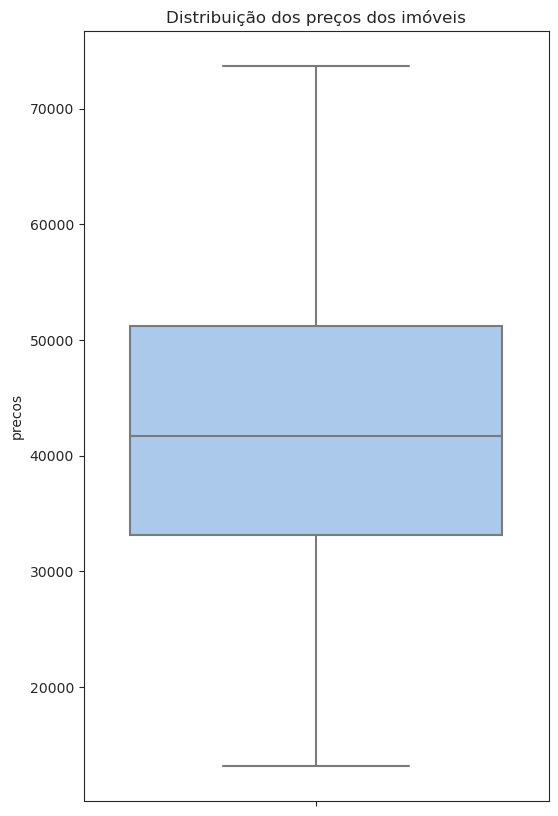

In [52]:
ax = sns.boxplot(data = dados,
 y = "precos",
 orient = 'v')
ax.figure.set_size_inches(6,10)
ax.set_title("Distribuição dos preços dos imóveis")

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<AxesSubplot: title={'center': 'Preços x Nº de Garagens'}, xlabel='Nº de Garagens', ylabel='Preços'>

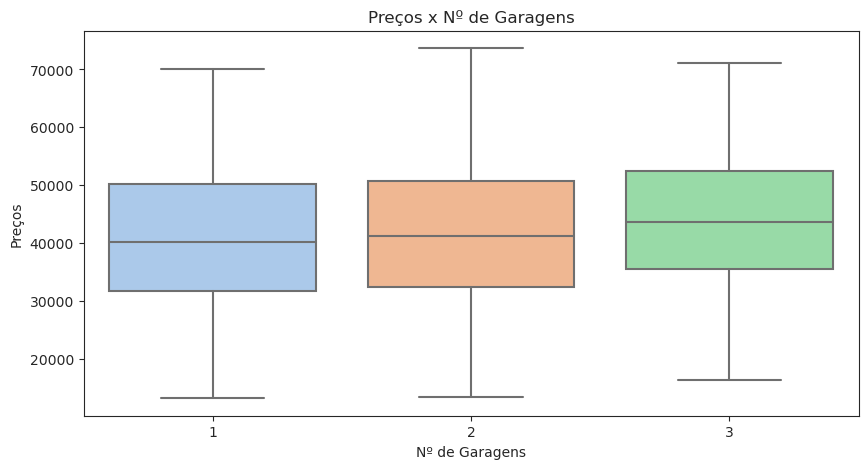

In [53]:
ax = sns.boxplot(
    data = dados,
    y = 'precos',
    x = 'garagem',
    orient= 'v' 
)

ax.figure.set_size_inches(10,5)
ax.set_ylabel("Preços")
ax.set_xlabel("Nº de Garagens")
ax.set_title("Preços x Nº de Garagens")
ax

### Box-plot (Preço X Banheiros)

<AxesSubplot: title={'center': 'Preços x Nº de Banheiros'}, xlabel='Nº de Banheiros', ylabel='Preços'>

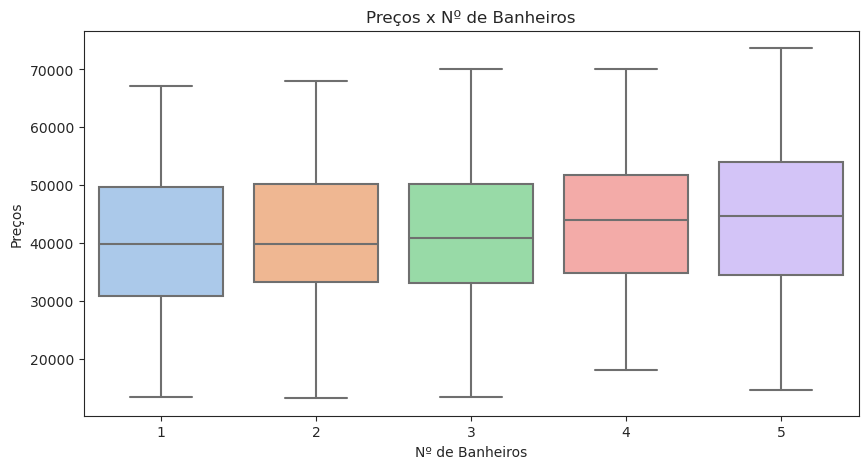

In [54]:
ax = sns.boxplot(
    data = dados,
    y = 'precos',
    x = 'banheiros',
    orient= 'v' 
)

ax.figure.set_size_inches(10,5)
ax.set_ylabel("Preços")
ax.set_xlabel("Nº de Banheiros")
ax.set_title("Preços x Nº de Banheiros")
ax

### Box-plot (Preço X Lareira)

<AxesSubplot: title={'center': 'Preços x Nº de Lareiras'}, xlabel='Nº de Lareiras', ylabel='Preços'>

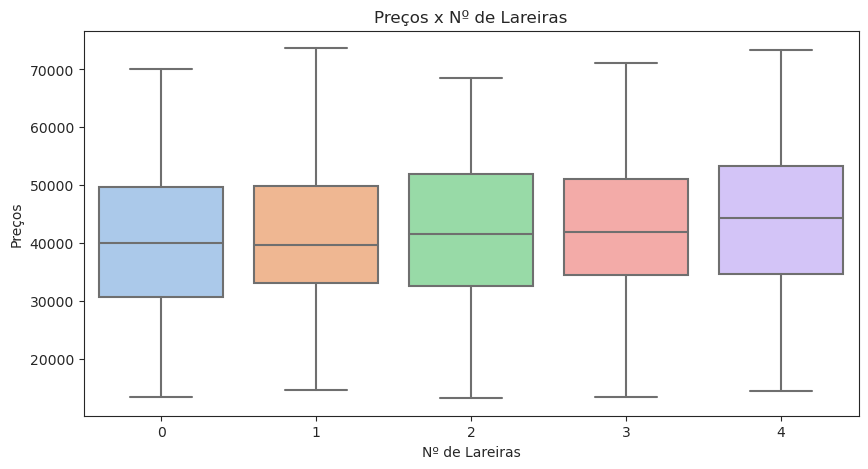

In [55]:
ax = sns.boxplot(
    data = dados,
    y = 'precos',
    x = 'lareira',
    orient= 'v' 
)

ax.figure.set_size_inches(10,5)
ax.set_ylabel("Preços")
ax.set_xlabel("Nº de Lareiras")
ax.set_title("Preços x Nº de Lareiras")
ax

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot: title={'center': 'Preços x Acabamento em mármore'}, xlabel='Há acabamento em mármore?', ylabel='Preços'>

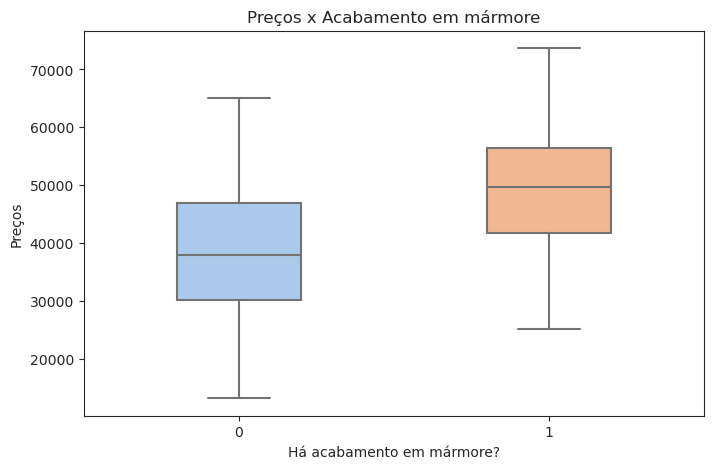

In [56]:
ax = sns.boxplot(
    data = dados,
    y = 'precos',
    x = 'marmore',
    orient= 'v',
    width= 0.4
)

ax.figure.set_size_inches(8,5)
ax.set_ylabel("Preços")
ax.set_xlabel("Há acabamento em mármore?")
ax.set_title("Preços x Acabamento em mármore")
ax

### Box-plot (Preço X Andares)

<AxesSubplot: title={'center': 'Preços x Número de andares'}, xlabel='Nº de Andares', ylabel='Preços'>

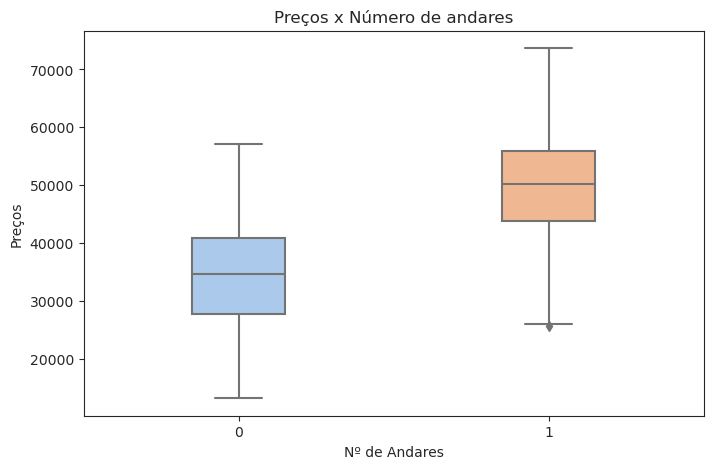

In [57]:
ax = sns.boxplot(
    data = dados,
    y = 'precos',
    x = 'andares',
    orient= 'v',
    width= 0.3 
)

ax.figure.set_size_inches(8,5)
ax.set_ylabel("Preços")
ax.set_xlabel("Nº de Andares")
ax.set_title("Preços x Número de andares")
ax

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/tmp/ipykernel_21373/189098800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( dados['precos'])


<AxesSubplot: title={'center': 'Distribuição de Frequências de preços de imóveis'}, xlabel='Preços de imóveis', ylabel='Frequência'>

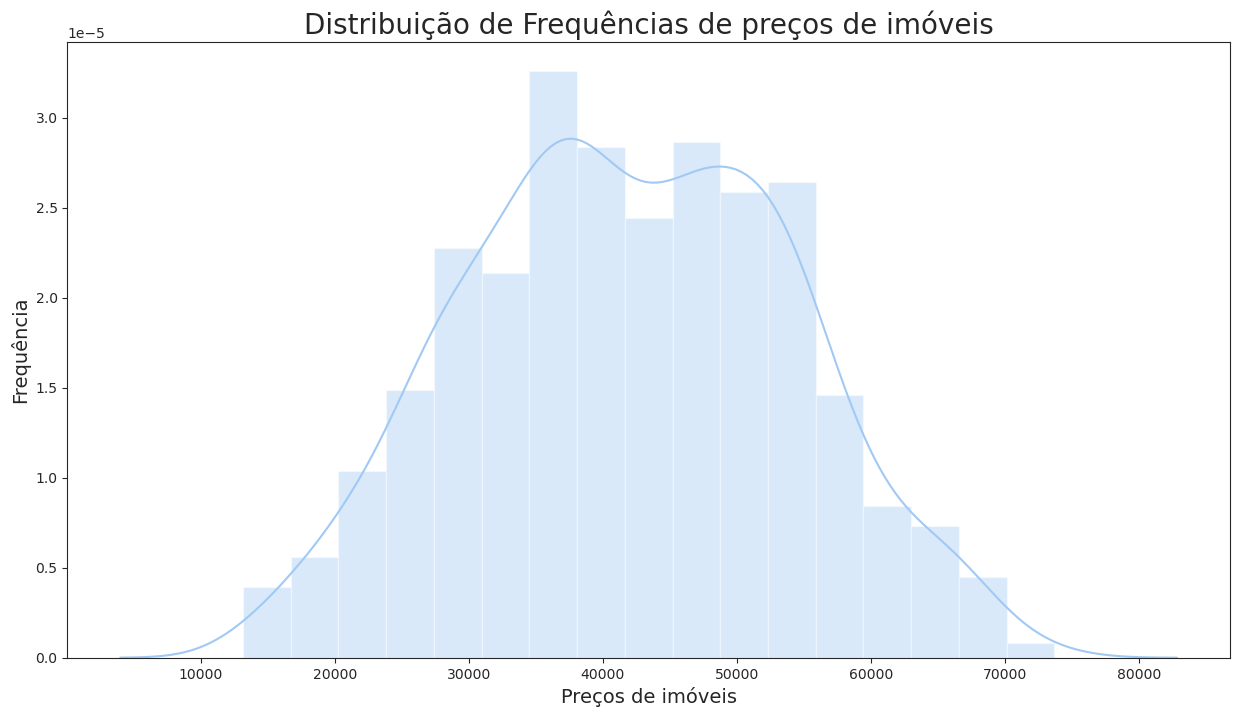

In [58]:
ax = sns.distplot( dados['precos'])
ax.figure.set_size_inches(15,8)
ax.set_title("Distribuição de Frequências de preços de imóveis", fontsize = 20)
ax.set_ylabel("Frequência", fontsize = 14)
ax.set_xlabel("Preços de imóveis", fontsize = 14)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

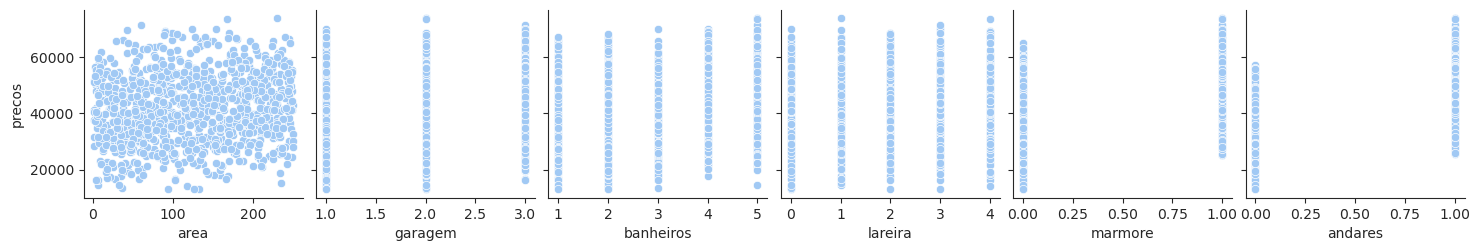

In [59]:
sns.pairplot(dados,
    y_vars = "precos",
    x_vars= ['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])

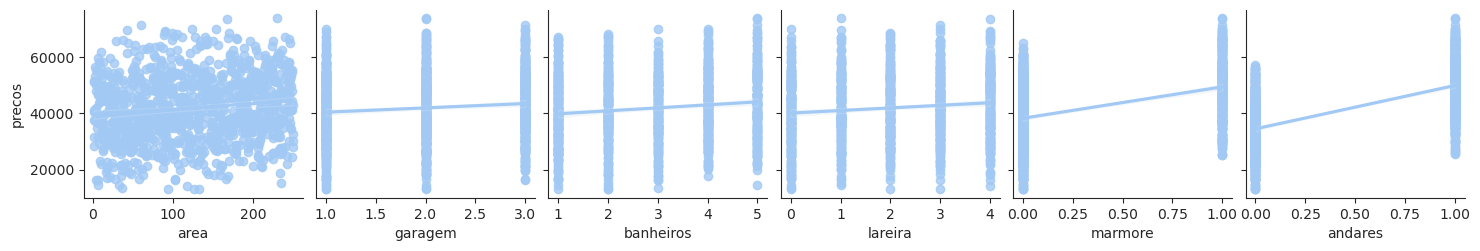

In [60]:
sns.pairplot(dados,
    y_vars = "precos",
    x_vars= ['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'],
    kind = 'reg')

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [61]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [62]:
y = dados['precos']

In [63]:
y.head()

0    51875
1    17875
2    47075
3    38575
4    33775
Name: precos, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [64]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

In [65]:
X.head()

,area,garagem,banheiros,lareira,marmore,andares
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1


## Criando os datasets de treino e de teste

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.30, #30% para teste e 70% para treino
                                                    random_state= 1) #Seed de aleatoriedade  

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [68]:
regressao_linear = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [69]:
modelo_regressao_linear = regressao_linear.fit(X_test, y_test)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [70]:
R2 = modelo_regressao_linear.score(X_train, y_train)
print("R2 = {:.2f}".format(R2))

R2 = 0.64


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [71]:
previsto = modelo_regressao_linear.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [72]:
R2_previsoes = metrics.r2_score(y_test, previsto)
print("R² = {:.2f}".format(R2_previsoes))

R² = 0.66


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [73]:
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [74]:
X_test

,area,garagem,banheiros,lareira,marmore,andares
0,37,1,1,3,0,1
1,249,3,2,3,0,0
2,178,3,4,1,1,0
3,129,3,5,2,1,1
4,233,1,1,1,1,0
...,...,...,...,...,...,...
295,233,1,2,3,0,1
296,55,1,2,3,0,1
297,233,2,3,3,0,0
298,203,2,2,1,0,1


In [75]:
y_test

0      41925
1      28175
2      54150
3      54675
4      27825
       ...  
295    61025
296    32825
297    37325
298    52325
299    66450
Name: precos, Length: 300, dtype: int64

In [76]:
print(X_test.loc[0], "\nPrevisto:",y_test[0])

area         37
garagem       1
banheiros     1
lareira       3
marmore       0
andares       1
Name: 0, dtype: int64 
Previsto: 41925


In [77]:
area = 37   
garagem = 1
banheiros = 1
lareira = 3
marmore = 0
andares = 1

previsao = modelo_regressao_linear.predict([[area, garagem, banheiros, lareira, marmore, andares]])
print("Com base em modelo de regressão linear, o preço previsto para o imóvel é de R$ {:,.2f}".format(previsao[0]))

Com base em modelo de regressão linear, o preço previsto para o imóvel é de R$ 41,568.18


/home/pedro/anaconda3/envs/tensorflow-gpu/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo

In [78]:
EQM = metrics.mean_squared_error(y_test, previsto)
REQM = np.sqrt(EQM)
R2 = metrics.r2_score(y_test, previsto)

print("EQM = {:.2f}\nREQM = {:.2f}\nR² = {:.2f}".format(EQM, REQM, R2))

EQM = 50463032.87
REQM = 7103.73
R² = 0.66


## Regressão Logística

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
modelo_regressao_logistica = LogisticRegression(random_state= 1)
modelo_regressao_logistica.fit(X_train, y_train)

/home/pedro/anaconda3/envs/tensorflow-gpu/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [81]:
previsto = modelo_regressao_logistica.predict(X_test)

In [82]:
modelo_regressao_logistica.score(X_train, y_train)

0.04857142857142857

In [83]:
R2_regressaologistica = metrics.r2_score(y_test, previsto)
print(R2_regressaologistica)

-0.08435826439333893


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [84]:
import pickle

## Salvando o modelo estimado

In [92]:
output = open('modelo_preco.pkl', 'wb')
pickle.dump(modelo_regressao_linear, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```

In [93]:
modelo = open('modelo_preco.pkl','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))

$ 46453.14


/home/pedro/anaconda3/envs/tensorflow-gpu/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Formulário interativo

In [94]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
area = widgets.Text(description="Área")
garagem = widgets.Text(description="Garagem")
banheiros = widgets.Text(description="Banheiros")
lareira = widgets.Text(description="Lareira")
marmore = widgets.Text(description="Mármore?")
andares = widgets.Text(description="Andares?")

botao = widgets.Button(description="Simular")

# Posicionando os controles
left = VBox([area, banheiros, marmore])
right = VBox([garagem, lareira, andares])
inputs = HBox([left, right])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(area.value if area.value else 0), 
                float(garagem.value if garagem.value else 0), 
                float(banheiros.value if banheiros.value else 0), 
                float(lareira.value if lareira.value else 0), 
                float(marmore.value if marmore.value else 0), 
                float(andares.value if andares.value else 0)
             ]]
    print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))

# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador) 

$ 20005.70


/home/pedro/anaconda3/envs/tensorflow-gpu/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


$ 20005.70


/home/pedro/anaconda3/envs/tensorflow-gpu/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


$ 20005.70


/home/pedro/anaconda3/envs/tensorflow-gpu/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())